## Model of Lupus Nephritis
#### see paper: [here](https://tbiomed.biomedcentral.com/articles/10.1186/1742-4682-7-14)

In [1]:
import numpy as np
import pandas as pd
rng = np.random.default_rng()
import pandas as pd

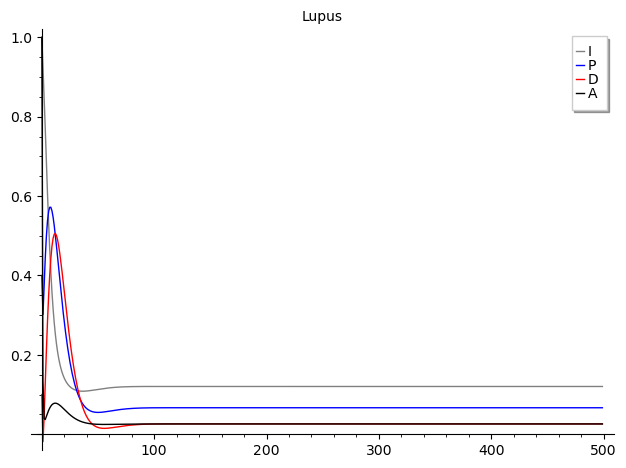

In [14]:
import numpy
# Define Variables and parameters
Lupusvars = list(var("I", "P", "D", "A"))

si = 0.002 #rate that immune complexes deposit in the kidneys
sid = 0.015 #immune response to accumulation of damaged cells
kid = 1
kip = 0.25 #rate of immune complex removal from system
kpi = 0.13 #rate of mediator activation and recruitment
kpp = 0.02 #immune response amplified by existing inflammatory response (kpi)
kpd = 0.001 #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
mup = 0.06 #decay of pro-inflammatory mediators
kdip = 0.025 #rate of phagocytosis of immune complexes by immune cells
kdp = 0.27 #rate at which collateral damage is produced by pro-inflammatory mediators 
mud = 0.2 #decay rate of damage
sa = 0.05 #addition of anti-inflammatory drugs
kap = 0.022 #intrarenal production of anti-inflammatory mediators
kad = 0.22 #intrarenal rate of tissue damage ??
mua = 2.2 #rate of anti-inflammatory agent degradation
#Ainf = 1

(xmin, xmax, ymin, ymax) = (0, 1, 0, 4)

def f(x):
    return x
    #return x/((1+(A/Ainf)^2))

Idot = f(si) + f(sid)*(D^2/(kid^2 + D^2)) - kip*f(P)*I
Pdot = f(kpi*I + kpp*P) + f(kpd*D) - mup*P - 0.5*A
Ddot = kdip*f(P)*I + kdp*f(P) - mud*D - 0.5*A
Adot = sa + f(kap*P + kad*D) - mua*A

LupusSystem = (Idot, Pdot, Ddot, Adot)
init = (1, 0.4, 0.1, 1)

tmax=500
t_range = srange(0, tmax, 1)

LupusSim = desolve_odeint(LupusSystem, init, t_range, Lupusvars)
LupusSim = numpy.insert(LupusSim, 0, t_range, axis=1)
Its = list_plot(LupusSim[::,(0,1)], plotjoined=True, color="grey", legend_label="I")
Pts = list_plot(LupusSim[::,(0,2)], plotjoined=True, color="blue", legend_label="P")
Dts = list_plot(LupusSim[::,(0,3)], plotjoined=True, color="red", legend_label="D")
Ats = list_plot(LupusSim[::,(0,4)], plotjoined=True, color="black", legend_label="A")
show(Its+Pts+Dts+Ats, title = "Lupus")

## CHIARA

In [52]:
import numpy as np
import random
from scipy.integrate import odeint

In [78]:

# Define Variables and parameters
def lupus_periodic_flare(init = (0.1, 0.4, 1.7, 0.1), # tuple: (I0, P0, D0, A0)
                         tmax=600, # number of days to simulate
                         sep = 45, # num of days in between flares
                         flare_length = 10, # num of days a flare lasts
                         si = 0.002, # base rate that immune complexes deposit in the kidneys
                         sid = 0.015, # base immune response to accumulation of damaged cells
                         kid = 1,
                         kip = 0.025, #rate of immune complex removal from system
                         kpi = 0.13, #rate of mediator activation and recruitment
                         kpp = 0.02, #immune response amplified by existing inflammatory response (kpi)
                         kpd = 0.001, #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
                         mup = 0.06, #decay of pro-inflammatory mediators
                         kdip = 0.025, #rate of phagocytosis of immune complexes by immune cells
                         kdp = 0.27, #rate at which collateral damage is produced by pro-inflammatory mediators 
                         mud = 0.04, #decay rate of damage
                         sa = 0.05, #addition of anti-inflammatory drugs
                         kap = 0.022, #intrarenal production of anti-inflammatory mediators
                         kad = 0.22, #intrarenal rate of tissue damage ??
                         mua = 2.2, #rate of anti-inflammatory agent degradation
                         Ainf = 1
                        ):

    Lupusvars = list(var("I", "P", "D", "A"))
    t_range = srange(0, tmax, 1)

    def fsid_t(t): #time dependency Sid
        sid = 0.002
        if numpy.mod(t,sep) <= flare_length : #gives the higher value for ~two weeks of time based on data
            sid = sid*5
        else:
            sid = 0.002
        return sid 

    def fsi_t(t): #time dependency Si
        si = 0.001
        if numpy.mod(t,sep) <= flare_length : 
            si = si*5
        else:
            si = 0.001
        return si

    def systems (IPDA, t, sa_t, si_t,sid_t, kip_t, kpp_t, kpi_t, kpd_t, kdip_t,kdp_t, kap_t,kad_t,mup_t,mua_t,mud_t,kid_t, Ainf_t ):
        I, P, D, A = IPDA 
        def f(x):
            return x/((1+A/Ainf)^2) 

        Idot = f(si_t(t)) + f(sid_t(t))*(D^2/(kid_t^2 + D^2)) - kip_t*f(P)*I
        Pdot = f(kpi_t*I + kpp_t*P) + f(kpd_t*D) - mup_t*P
        Ddot = kdip_t*f(P)*I + kdp_t*f(P) - mud_t*D
        Adot = sa_t + f(kap_t*P + kad_t*D) - mua_t*A

        LupusSystem = (Idot, Pdot, Ddot, Adot)
        return LupusSystem

    IPDAsim = odeint(systems, init, t_range, args=(sa, fsi_t, fsid_t, kip, kpp, kpi, kpd, kdip,kdp, kap,kad,mup,mua,mud,kid, Ainf))
    IPDAsim = np.insert(IPDAsim, 0, t_range, axis=1)

    return IPDAsim

In [79]:
def plot_ts4(sim, title = ""):
    Its = list_plot(sim[::,(0,1)], plotjoined=True, color="grey", legend_label="I")
    Pts = list_plot(sim[::,(0,2)], plotjoined=True, color="blue", legend_label="P")
    Dts = list_plot(sim[::,(0,3)], plotjoined=True, color="red", legend_label="D")
    Ats = list_plot(sim[::,(0,4)], plotjoined=True, color="purple", legend_label="A", title = title)
    return Its+Pts+Dts+Ats

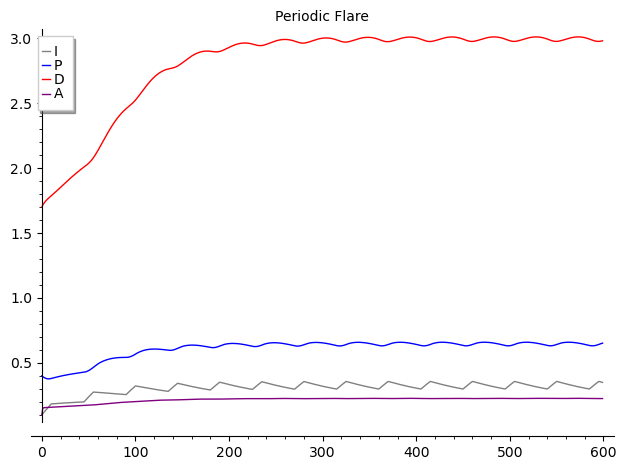

In [80]:
plot_ts4(lupus_periodic_flare(), title = "Periodic Flare")

In [142]:

# LUPUS STOCHASTIC FLARE IS GETTING RETIRED. 
# SHOULD USE `lupus_flare_tsinput()` with `generate_ts_params()` FOR RANDOM PROCESS INSTEAD

def lupus_stochastic_flare(init = (0.1, 0.4, 1.7, 0.1), # tuple: (I0, P0, D0, A0)
                         tmax=600, # number of days to simulate
                         flare_odds = 0.1, # % likelihood flare will start on a non flare day
                         flare_length = 5, # num of days a flare lasts
                        # si = 0.002, # base rate that immune complexes deposit in the kidneys
                         #sid = 0.015, # base immune response to accumulation of damaged cells
                         kid = 1,
                         kip = 0.025, #rate of immune complex removal from system
                         kpi = 0.13, #rate of mediator activation and recruitment
                         kpp = 0.02, #immune response amplified by existing inflammatory response (kpi)
                         kpd = 0.001, #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
                         mup = 0.06, #decay of pro-inflammatory mediators
                         kdip = 0.025, #rate of phagocytosis of immune complexes by immune cells
                         kdp = 0.27, #rate at which collateral damage is produced by pro-inflammatory mediators 
                         mud = 0.04, #decay rate of damage
                         sa = 0.05, #addition of anti-inflammatory drugs
                         kap = 0.022, #intrarenal production of anti-inflammatory mediators
                         kad = 0.22, #intrarenal rate of tissue damage ??
                         mua = 2.2, #rate of anti-inflammatory agent degradation
                         Ainf = 1
                        ):

    Lupusvars = list(var("I", "P", "D", "A"))
    t_range = srange(0, tmax, 1)
    # set some values to keep track of if we are on a flare
    #is_on_flare = False
    #flare_day_counter = 0
    class flare_tracker:
        def __init__(self, is_on_flare, flare_day_counter):
            self.is_on_flare = is_on_flare
            self.flare_day_counter = flare_day_counter

    my_f_tracker = flare_tracker(False, 0)

    def fsid_t(t, f_tracker = my_f_tracker): #time dependency Sid
        
        sid = 0.015 # HARD CODE FOR NOW
        
        # end flare if it has been 5 days
        if f_tracker.flare_day_counter > flare_length:
            f_tracker.is_on_flare = False
            f_tracker.flare_day_counter = 0
        
        # give flare value
        if (f_tracker.is_on_flare):
            sid = sid*5
            f_tracker.flare_day_counter += 1 # add one to flare day counter here

        #print("SID to be returned: ", sid)
        return sid 

    def fsi_t(t, f_tracker = my_f_tracker): #time dependency Si
        si = 0.002 # HARD CODE FOR NOW
        if not (f_tracker.is_on_flare):
            # start flare with likelihood `flare_odds`
            flare_start = rng.binomial(n = 1, p = flare_odds)
            if flare_start == 1:
                f_tracker.is_on_flare = True
                
        if (f_tracker.is_on_flare):
            si = si*5

        #print("SI to be returned: ", si)
        return si

    def systems (IPDA, t, si_t,sid_t):
        I, P, D, A = IPDA 
        def f(x):
            return x/((1+A/Ainf)^2) 

        kid = 1
        kip = 0.025 #rate of immune complex removal from system
        kpi = 0.13 #rate of mediator activation and recruitment
        kpp = 0.02 #immune response amplified by existing inflammatory response (kpi)
        kpd = 0.001 #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
        mup = 0.06 #decay of pro-inflammatory mediators
        kdip = 0.025 #rate of phagocytosis of immune complexes by immune cells
        kdp = 0.27 #rate at which collateral damage is produced by pro-inflammatory mediators 
        mud = 0.04 #decay rate of damage
        sa = 0.05 #addition of anti-inflammatory drugs
        kap = 0.022 #intrarenal production of anti-inflammatory mediators
        kad = 0.22 #intrarenal rate of tissue damage ??
        mua = 2.2 #rate of anti-inflammatory agent degradation
        Ainf = 1

        Idot = f(si_t(t)) + f(sid_t(t))*(D^2/(kid^2 + D^2)) - kip*f(P)*I
        Pdot = f(kpi*I + kpp*P) + f(kpd*D) - mup*P
        Ddot = kdip*f(P)*I + kdp*f(P) - mud*D
        Adot = sa + f(kap*P + kad*D) - mua*A

        LupusSystem = (Idot, Pdot, Ddot, Adot)
        return LupusSystem

    IPDAsim = odeint(systems, init, t_range, args=(fsi_t, fsid_t,))
    IPDAsim = np.insert(IPDAsim, 0, t_range, axis=1)

    return IPDAsim

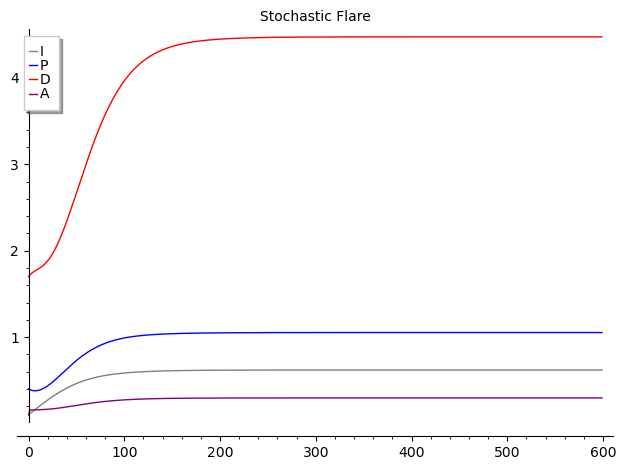

In [149]:
plot_ts4(lupus_stochastic_flare(flare_length=5), title = "Stochastic Flare")

In [4]:
# randomly generate times that have flares
def generate_ts_params(tmax = 600, flare_odds = 0.05, flare_length = 5, si_0 = 0.002, sid_0 = 0.015, sa_0 = 0.2):
    
    # set some values to keep track of if we are on a flare
    flare_ts = []
    flare_tracker = False
    flare_day = 0
    for i in range(tmax):
        event = rng.binomial(n = 1, p = flare_odds)
        if event == 1:
            flare_tracker = True
        if (flare_tracker) & (flare_day < flare_length):
            flare_ts.append("flare")
            flare_day += 1
        else:
            flare_ts.append("no flare")
        if flare_day == flare_length:
            flare_tracker = False
            flare_day = 0

    by_time_params = pd.DataFrame(srange(0, tmax, 1), columns = ["time"], dtype = "float")

    by_time_params['flare_status'] = np.array(flare_ts)

    by_time_params['si'] = np.where(by_time_params['flare_status'] == "flare",
                                si_0 *5,
                                si_0)
    by_time_params['sid'] = np.where(by_time_params['flare_status'] == "flare",
                                sid_0 *5,
                                sid_0)
    by_time_params['sa'] = np.where(by_time_params['flare_status'] == "flare",
                                sa_0/4,
                                sa_0)
    return by_time_params

In [275]:
generate_ts_params()[generate_ts_params()["time"] == 1]["si"]

1    0.002
Name: si, dtype: float64

In [5]:
def lupus_flare_tsinput(by_time_params = generate_ts_params(tmax = 600),
                         init = (0.1, 0.4, 1.7, 0.1), # tuple: (I0, P0, D0, A0)
                         tmax=600, # number of days to simulate # num of days a flare lasts
                         kid = 1,
                         kip = 0.025, #rate of immune complex removal from system
                         kpi = 0.13, #rate of mediator activation and recruitment
                         kpp = 0.02, #immune response amplified by existing inflammatory response (kpi)
                         kpd = 0.001, #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
                         mup = 0.06, #decay of pro-inflammatory mediators
                         kdip = 0.025, #rate of phagocytosis of immune complexes by immune cells
                         kdp = 0.27, #rate at which collateral damage is produced by pro-inflammatory mediators 
                         mud = 0.04, #decay rate of damage
                         #sa = 0., #addition of anti-inflammatory drugs
                         kap = 0.022, #intrarenal production of anti-inflammatory mediators
                         kad = 0.22, #intrarenal rate of tissue damage ??
                         mua = 2.2, #rate of anti-inflammatory agent degradation
                         Ainf = 1
                        ):

    Lupusvars = list(var("I", "P", "D", "A"))
    t_range = srange(0, tmax, 1)

    def fsid_t(t): #time dependency Sid
        integer = round(t)
        return by_time_params.to_dict(orient = "index").get(integer).get("sid")

    def fsi_t(t): #time dependency Si
        integer = round(t)
        return by_time_params.to_dict(orient = "index").get(integer).get("si")

    def fsa_t(t): #time dependency Sa
        integer = round(t)
        return by_time_params.to_dict(orient = "index").get(integer).get("sa")


    def systems (IPDA, t, si_t,sid_t,sa_t):
        I, P, D, A = IPDA 
        def f(x):
            return x/((1+A/Ainf)^2) 

        Idot = f(si_t(t)) + f(sid_t(t))*(D^2/(kid^2 + D^2)) - kip*f(P)*I
        Pdot = f(kpi*I + kpp*P) + f(kpd*D) - mup*P
        Ddot = kdip*f(P)*I + kdp*f(P) - mud*D
        Adot = sa_t(t) + f(kap*P + kad*D) - mua*A

        LupusSystem = (Idot, Pdot, Ddot, Adot)
        return LupusSystem

    IPDAsim = odeint(systems, init, t_range, args=(fsi_t, fsid_t, fsa_t))
    IPDAsim = np.insert(IPDAsim, 0, t_range, axis=1)

    return IPDAsim

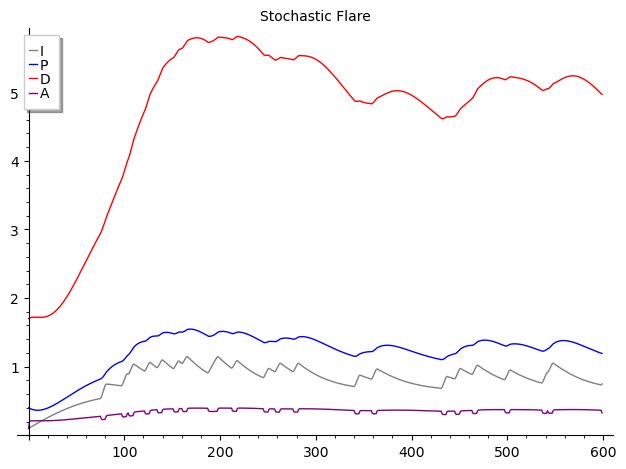

In [304]:
plot_ts4(lupus_flare_tsinput(), title = "Stochastic Flare")

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint
import jupyter_beeper
b = jupyter_beeper.Beeper()
# Default config is frequency=440 Hz, secs=0.7 seconds, and
# blocking=False (b.beep() will return when the sound begins)
b.beep(secs = 1.5, frequency=500)

In [ ]:
def lupus_system(init, t, paras):
        I, P, D, A = init 

        # get params
        si = paras['si'].value #rate that immune complexes deposit in the kidneys
        sa = paras['sa'].value 
        sid = paras['sid'].value #immune response to accumulation of damaged cells
        kip = paras['kip'].value #rate of immune complex removal from system
        kpi = paras['kpi'].value #rate of mediator activation and recruitment
        kpp = paras['kpp'].value #immune response amplified by existing inflammatory response (kpi)
        kpd = paras['kpd'].value #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
        mup = paras['mup'].value #decay of pro-inflammatory mediators
        kdip = paras['kdip'].value #rate of phagocytosis of immune complexes by immune cells
        kdp = paras['kdp'].value #rate at which collateral damage is produced by pro-inflammatory mediators 
        mud = paras['mud'].value #decay rate of damage
        kap = paras['kap'].value #intrarenal production of anti-inflammatory mediators
        kad = paras['kad'].value #intrarenal rate of tissue damage ??
        mua = paras['mua'].value #rate of anti-inflammatory agent degradation
        Ainf = 0.45
        def f(x):
            return x/((1+(A/Ainf)^2))
            #return x
        
        Idot = f(si) + f(sid)*(D^2/(1 + D^2)) - kip*f(P)*I
        Pdot = f(kpi*I + kpp*P) + f(kpd*D) - mup*P
        Ddot = kdip*f(P)*I + kdp*f(P) - mud*D
        Adot = sa + f(kap*P + kad*D) - mua*A

        LupusSystem = [Idot, Pdot, Ddot, Adot]
        return LupusSystem

def g(t_range, init, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    IPDAsim = odeint(lupus_system, init, t_range, args=(paras,))
    IPDAsim = np.insert(IPDAsim, 0, t_range, axis=1) # add time values
    return IPDAsim


def residual(paras, t_range, data):

    """
    compute the residual between actual data and fitted data
    """
    model = g(t_range, init, paras)

    # you only have data for damage as function of time
    damage_model = model[:, 3]

    return (damage_model - data).ravel()

In [184]:
new_data = pd.read_csv("data/upc_data.csv")
# I'm willing to live without negative days
new_data = new_data[new_data['day'] >= 0]
new_data = new_data[new_data['day'] <= 500]
data_list = []
for eye_d in new_data['ID'].unique():
    data_list.append(new_data[new_data['ID'] == eye_d].sort_values("day"))

stochastic_dict = dict.fromkeys(new_data['ID'].unique())
fixed_dict = dict.fromkeys(new_data['ID'].unique())

In [185]:
def fit_fixed(data, ax):
    t_measured = np.array(data['day'])
    uPCR_measured = np.array(data['uPCR'])
    #plt.figure()
    ax.scatter(t_measured, uPCR_measured, marker='o', color='b', label='measured data', s=5)

    init = (0.1, 0.5, uPCR_measured[0], 0.1)
    t_range = srange(0, t_measured.max() + 10, 1)

    # set parameters including bounds; you can also fix parameters (use ,vary=False)
    params = Parameters()

    params.add('sa', value=1, min=0.0001, max=0.5, vary = False)
    params.add('si', value=0.1, min=0.0001, max=0.5, vary = False)
    params.add('sid', value=0.25, min=0.0001, max=0.5, vary = False)
    params.add('kip', value=0.027, min=0.0001, max=0.5)
    params.add('kpi', value=0.01, min=0.0001, max=1.)
    params.add('kpp', value=0.018, min=0.0001, max=2., vary = False) #
    params.add('kpd', value=0.001, min=0.0001, max=5., vary = False)#
    params.add('mup', value=0.66, min=0.0001, max=1., vary = False)
    params.add('kdip', value=0.104, min=0.0001, max=0.5)
    params.add('kdp', value=0.001, min=0.0001, max=1., vary = False)
    params.add('mud', value=0.087, min=0.0001, max=0.1, vary = False)
    params.add('kap', value=0.001, min=0.0001, max=0.1)
    params.add('kad', value=0.001, min=0.0001, max=0.5, vary = False)
    params.add('mua', value=2.2, min=0.0001, max=5., vary = False)#

    # fit model
    result = minimize(residual, params, args=(t_measured, uPCR_measured), method='leastsq')  # leastsq method
    # check results of the fit
    data_fitted = g(t_measured, init, result.params)

    # plot fitted data
    ax.plot(t_measured, data_fitted[:, 3], '-', linewidth=2, color='red', label='fitted data')
    ax.set_title("Fixed Fit: " + data['ID'].to_list()[0])
    ax.legend()
    ax.set_xlim([0, max(t_measured) + 20])
    # display fitted statistics

    #plt.show()

    return (result)

In [187]:
# want to do this for a whole bunch of models
def fixed_wrapper(dataset):
    fig, ax = plt.subplots(1, 1)
    res = fit_fixed(dataset, ax)
    fixed_dict[dataset['ID'].to_list()[0]] = (res, fig, ax)

Parallel(n_jobs=4, verbose = 20)(delayed(fixed_wrapper)(dataset) for dataset in data_list)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed: 13.0min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 14.4min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed: 18.6min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed: 20.2min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed: 22.6min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 27.0min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 32.4min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed: 37.8min
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed: 39.4min
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed: 39.5min
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed: 39.8min
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed: 43.0min
[Parallel(

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8448
    # data points      = 14
    # variables        = 11
    chi-square         = 0.00351372
    reduced chi-square = 0.00117124
    Akaike info crit   = -94.0619146
    Bayesian info crit = -87.0322840
[[Variables]]
    si:    6.21691423 +/- 3728.10994 (59967.21%) (init = 0.009000000)
    sa:    2.70305174 +/- 485.155257 (17948.43%) (init = 1.000000)
    sid:   4.99629791 +/- 5310.55591 (106289.82%) (init = 0.01000000)
    kip:   0.49999983 +/- 28.5525343 (5710.51%) (init = 0.02700000)
    kpi:   0.25531781 +/- 18.9413879 (7418.75%) (init = 0.01000000)
    kpp:   0.01800000 (fixed)
    kpd:   0.001000000 (fixed)
    mup:   0.40289991 +/- 220.872089 (54820.59%) (init = 0.6600000)
    kdip:  7.9815e-04 +/- 0.24750171 (31009.48%) (init = 0.1040000)
    kdp:   1.0002e-04 +/- 0.52730793 (527182.06%) (init = 0.001000000)
    mud:   0.01728104 +/- 0.14616356 (845.80%) (init = 0.08700000)
    kap:   2.3708e-04 +/

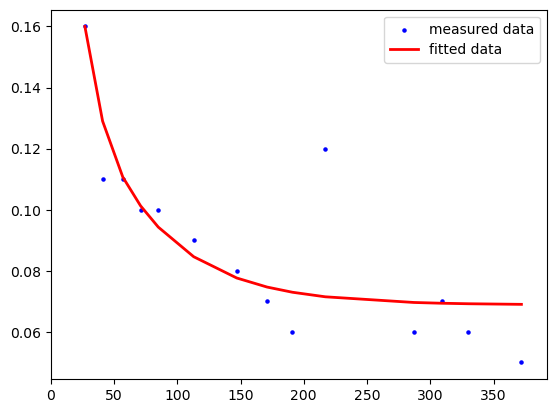

In [50]:
# measured data: ACCESS_966565 

t_measured = np.array(a_966565['day'])
uPCR_measured = np.array(a_966565['uPCR'])
plt.figure()
plt.scatter(t_measured, uPCR_measured, marker='o', color='b', label='measured data', s=5)

init = (0.1, 0.5, uPCR_measured[0], 0.1)
t_range = srange(0, 450, 1)


# set parameters including bounds; you can also fix parameters (use ,vary=False)
params = Parameters()

params.add('sa', value=1, min=0.0001, max=0.5, vary = False)
params.add('si', value=0.1, min=0.0001, max=0.5, vary = False)
params.add('sid', value=0.25, min=0.0001, max=0.5, vary = False)
params.add('kip', value=0.027, min=0.0001, max=0.5)
params.add('kpi', value=0.01, min=0.0001, max=1.)
params.add('kpp', value=0.018, min=0.0001, max=2., vary = False) #
params.add('kpd', value=0.001, min=0.0001, max=5., vary = False)#
params.add('mup', value=0.66, min=0.0001, max=1., vary = False)
params.add('kdip', value=0.104, min=0.0001, max=0.5)
params.add('kdp', value=0.001, min=0.0001, max=1., vary = False)
params.add('mud', value=0.087, min=0.0001, max=0.1, vary = False)
params.add('kap', value=0.001, min=0.0001, max=0.1)
params.add('kad', value=0.001, min=0.0001, max=0.5, vary = False)
params.add('mua', value=2.2, min=0.0001, max=5., vary = False)#


# fit model
result = minimize(residual, params, args=(t_measured, uPCR_measured), method='leastsq')  # leastsq nelder
# check results of the fit
data_fitted = g(t_measured, init, result.params)

# plot fitted data
plt.plot(t_measured, data_fitted[:, 3], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
plt.xlim([0, max(t_measured) + 20])
#plt.ylim([0, 1.1 * max(data_fitted[:, 1])])
# display fitted statistics
report_fit(result)

plt.show()


# ADD STOCHASTIC CHANGE TO FIT

In [207]:
by_time_params = pd.read_csv("data/by_time_params.csv")
by_time_params = by_time_params[['time', 'flare_status', 'si', 'sid', 'sa']].to_dict(orient = "index")

In [ ]:
#by_time_params = generate_ts_params(tmax = 501, 
#                                    flare_length = 5,
#                                    sa_0 = 1, si_0 = 0.1, sid_0 = 0.25).to_dict(orient = "index")
# pd.DataFrame(by_time_params).T.to_csv("data/by_time_params.csv")


def lupus_system_stoch(init, t, paras):
        I, P, D, A = init 

        # get params
        #si = paras['si'].value #rate of immune complex removal from system
        #sid = paras['sid'].value #rate of immune complex removal from system
        #sa = paras['sa'].value #rate of immune complex removal from system
        
        kip = paras['kip'].value #rate of immune complex removal from system
        kpi = paras['kpi'].value #rate of mediator activation and recruitment
        kpp = paras['kpp'].value #immune response amplified by existing inflammatory response (kpi)
        kpd = paras['kpd'].value #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
        mup = paras['mup'].value #decay of pro-inflammatory mediators
        kdip = paras['kdip'].value #rate of phagocytosis of immune complexes by immune cells
        kdp = paras['kdp'].value #rate at which collateral damage is produced by pro-inflammatory mediators 
        mud = paras['mud'].value #decay rate of damage
        kap = paras['kap'].value #intrarenal production of anti-inflammatory mediators
        kad = paras['kad'].value #intrarenal rate of tissue damage ??
        mua = paras['mua'].value #rate of anti-inflammatory agent degradation

        # get our parameters which were time dependent
        time_int = round(t)
        si = by_time_params.get(time_int).get("si")
        sid = by_time_params.get(time_int).get("sid")
        sa = by_time_params.get(time_int).get("sa")
        
        def f(x):
            return x/((1+(A/0.45)^2)) 
            #return x
        
        Idot = f(si) + f(sid)*(D^2/(1 + D^2)) - kip*f(P)*I
        Pdot = f(kpi*I + kpp*P) + f(kpd*D) - mup*P
        Ddot = kdip*f(P)*I + kdp*f(P) - mud*D
        Adot = sa + f(kap*P + kad*D) - mua*A

        LupusSystem = [Idot, Pdot, Ddot, Adot]
        return LupusSystem

def g_stoch(t_range, init, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    IPDAsim = odeint(lupus_system_stoch, init, t_range, args=(paras,))
    IPDAsim = np.insert(IPDAsim, 0, t_range, axis=1) # add time values
    return IPDAsim


def residual_stoch(paras, t_range, data):

    """
    compute the residual between actual data and fitted data
    """
    model = g_stoch(t_range, init, paras)

    # you only have data for damage as function of time
    damage_model = model[:, 3]

    return (damage_model - data).ravel()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 263
    # data points      = 14
    # variables        = 8
    chi-square         = 0.00295746
    reduced chi-square = 4.9291e-04
    Akaike info crit   = -102.474763
    Bayesian info crit = -97.3623040
[[Variables]]
    kip:   0.23070383 +/- 1.49146300 (646.48%) (init = 0.02700000)
    kpi:   0.07891918 +/- 0.54410518 (689.45%) (init = 0.01000000)
    kpp:   0.01800000 (fixed)
    kpd:   0.001000000 (fixed)
    mup:   0.99291931 +/- 6.59050132 (663.75%) (init = 0.6600000)
    kdip:  0.00123886 +/- 0.03025941 (2442.53%) (init = 0.1040000)
    kdp:   0.01873759 +/- 0.09855131 (525.95%) (init = 0.001000000)
    mud:   0.03276307 +/- 0.10127447 (309.11%) (init = 0.08700000)
    kap:   0.00144478 +/- 21.7302320 (1504047.53%) (init = 0.001000000)
    kad:   0.11525709 +/- 40.9496297 (35528.95%) (init = 0.001000000)
    mua:   2.200000 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(kip, kdip)

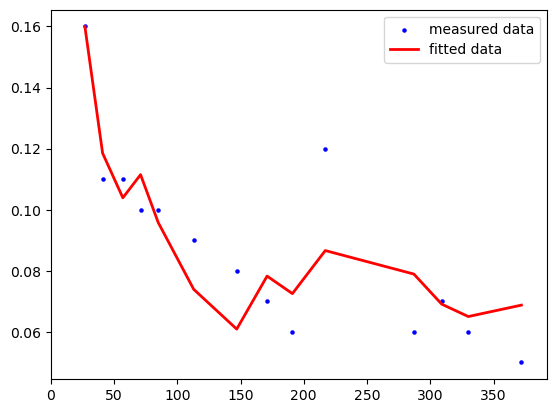

In [82]:
# measured data: ACCESS_966565 
# this code chunk is retired i think

t_measured = np.array(a_966565['day'])
uPCR_measured = np.array(a_966565['uPCR'])
plt.figure()
plt.scatter(t_measured, uPCR_measured, marker='o', color='b', label='measured data', s=5)

init = (0.1, 0.5, uPCR_measured[0], 0.1)
t_range = srange(0, t_measured.max() + 10, 1)


# set parameters including bounds; you can also fix parameters (use ,vary=False)
params = Parameters()

params.add('kip', value=0.027, min=0.0001, max=0.5)
params.add('kpi', value=0.01, min=0.0001, max=1.)
params.add('kpp', value=0.018, min=0.0001, max=2., vary = False) #
params.add('kpd', value=0.001, min=0.0001, max=5., vary = False)#
params.add('mup', value=0.66, min=0.0001, max=1.)
params.add('kdip', value=0.104, min=0.0001, max=0.5)
params.add('kdp', value=0.001, min=0.0001, max=1.)
params.add('mud', value=0.087, min=0.0001, max=0.1)
params.add('kap', value=0.001, min=0.0001, max=0.1)
params.add('kad', value=0.001, min=0.0001, max=0.5)
params.add('mua', value=2.2, min=0.0001, max=5., vary = False)#

# fit model
result = minimize(residual_stoch, params, args=(t_measured, uPCR_measured), method='leastsq')  # leastsq nelder
# check results of the fit
data_fitted = g_stoch(t_measured, init, result.params)

# plot fitted data
plt.plot(t_measured, data_fitted[:, 3], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
plt.xlim([0, max(t_measured) + 20])
# display fitted statistics
report_fit(result)

plt.show()

import jupyter_beeper
b = jupyter_beeper.Beeper()
# Default config is frequency=440 Hz, secs=0.7 seconds, and
# blocking=False (b.beep() will return when the sound begins)
b.beep(secs = 1.5, frequency=500)

In [193]:
def fit_stochastic(data, ax):
    t_measured = np.array(data['day'])
    uPCR_measured = np.array(data['uPCR'])
    #plt.figure()
    ax.scatter(t_measured, uPCR_measured, marker='o', color='b', label='measured data', s=5)

    init = (0.1, 0.5, uPCR_measured[0], 0.1)
    t_range = srange(0, t_measured.max() + 10, 1)


    # set parameters including bounds; you can also fix parameters (use ,vary=False)
    params = Parameters()

    params.add('kip', value=0.027, min=0.0001, max=0.5)
    params.add('kpi', value=0.01, min=0.0001, max=1.)
    params.add('kpp', value=0.018, min=0.0001, max=2., vary = False) #
    params.add('kpd', value=0.001, min=0.0001, max=5., vary = False)#
    params.add('mup', value=0.66, min=0.0001, max=1., vary = False)
    params.add('kdip', value=0.104, min=0.0001, max=0.5, vary = False)
    params.add('kdp', value=0.001, min=0.0001, max=1., vary = False)
    params.add('mud', value=0.087, min=0.0001, max=0.1, vary = False)
    params.add('kap', value=0.001, min=0.0001, max=0.1)
    params.add('kad', value=0.001, min=0.0001, max=0.5, vary = False)
    params.add('mua', value=2.2, min=0.0001, max=5., vary = False)#

    # fit model
    result = minimize(residual_stoch, params, args=(t_measured, uPCR_measured), method='leastsq')  # leastsq nelder
    # check results of the fit
    data_fitted = g_stoch(t_measured, init, result.params)

    # plot fitted data
    ax.plot(t_measured, data_fitted[:, 3], '-', linewidth=2, color='red', label='fitted data')
    ax.set_title("Stochastic Fit: " + data['ID'].to_list()[0])
    ax.legend()
    ax.set_xlim([0, max(t_measured) + 20])
    # display fitted statistics

    #plt.show()

    return (result)

In [138]:
import numba
from tqdm import tqdm

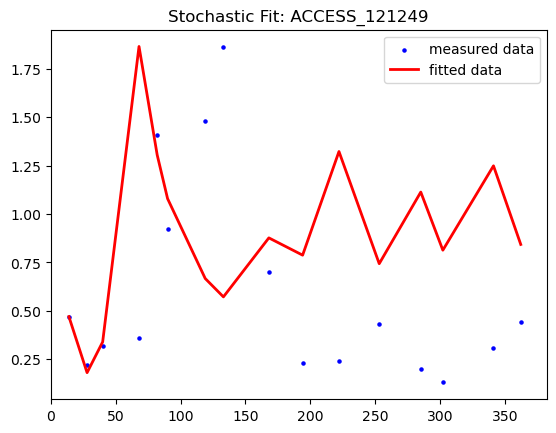

In [194]:
fig, ax = plt.subplots(1, 1)
res = fit_stochastic(data_list[0], ax)
stochastic_dict[data_list[0]['ID'].to_list()[0]] = (res, fig, ax)

In [195]:
stochastic_dict

{'ACCESS_121249': (<lmfit.minimizer.MinimizerResult object at 0x16913c050>,
  <Figure size 640x480 with 1 Axes>,
  <Axes: title={'center': 'Stochastic Fit: ACCESS_121249'}>),
 'ACCESS_145616': None,
 'ACCESS_146963': None,
 'ACCESS_168120': None,
 'ACCESS_207331': None,
 'ACCESS_220193': None,
 'ACCESS_228482': None,
 'ACCESS_240896': None,
 'ACCESS_248873': None,
 'ACCESS_256457': None,
 'ACCESS_279134': None,
 'ACCESS_294996': None,
 'ACCESS_298381': None,
 'ACCESS_323258': None,
 'ACCESS_352047': None,
 'ACCESS_362847': None,
 'ACCESS_366444': None,
 'ACCESS_381640': None,
 'ACCESS_393472': None,
 'ACCESS_455644': None,
 'ACCESS_482606': None,
 'ACCESS_510271': None,
 'ACCESS_571233': None,
 'ACCESS_604457': None,
 'ACCESS_608354': None,
 'ACCESS_608552': None,
 'ACCESS_616543': None,
 'ACCESS_663410': None,
 'ACCESS_665783': None,
 'ACCESS_680322': None,
 'ACCESS_700421': None,
 'ACCESS_710769': None,
 'ACCESS_728908': None,
 'ACCESS_731114': None,
 'ACCESS_744305': None,
 'ACCESS_

In [175]:
from tqdm import tqdm
from joblib import Parallel, delayed

In [188]:
# want to do this for a whole bunch of models
def stochastic_wrapper(dataset):
    fig, ax = plt.subplots(1, 1)
    res = fit_stochastic(dataset, ax)
    stochastic_dict[dataset['ID'].to_list()[0]] = (res, fig, ax)

Parallel(n_jobs=5, verbose = 20)(delayed(stochastic_wrapper)(dataset) for dataset in data_list)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:   52.2s
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  6.4min
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed: 25.7min
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed: 44.1min
[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed: 48.3min
[Parallel(n_jobs=5)]: Done   7 tasks      | elapsed: 117.4min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed: 121.4min
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed: 149.1min
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed: 161.8min
[Parallel(n_jobs=5)]: Done  11 tasks      | elapsed: 162.3min
[Parallel(n_jobs=5)]: Done  12 tasks      | elapsed: 164.0min
[Parallel(n_jobs=5)]: Done  13 tasks      | elapsed: 166.7min
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed: 167.4min
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed: 169.1min
[

KeyboardInterrupt: 

In [192]:
stochastic_dict

{'ACCESS_121249': None,
 'ACCESS_145616': None,
 'ACCESS_146963': None,
 'ACCESS_168120': None,
 'ACCESS_207331': None,
 'ACCESS_220193': None,
 'ACCESS_228482': None,
 'ACCESS_240896': None,
 'ACCESS_248873': None,
 'ACCESS_256457': None,
 'ACCESS_279134': None,
 'ACCESS_294996': None,
 'ACCESS_298381': None,
 'ACCESS_323258': None,
 'ACCESS_352047': None,
 'ACCESS_362847': None,
 'ACCESS_366444': None,
 'ACCESS_381640': None,
 'ACCESS_393472': None,
 'ACCESS_455644': None,
 'ACCESS_482606': None,
 'ACCESS_510271': None,
 'ACCESS_571233': None,
 'ACCESS_604457': None,
 'ACCESS_608354': None,
 'ACCESS_608552': None,
 'ACCESS_616543': None,
 'ACCESS_663410': None,
 'ACCESS_665783': None,
 'ACCESS_680322': None,
 'ACCESS_700421': None,
 'ACCESS_710769': None,
 'ACCESS_728908': None,
 'ACCESS_731114': None,
 'ACCESS_744305': None,
 'ACCESS_766786': None,
 'ACCESS_771631': None,
 'ACCESS_784803': None,
 'ACCESS_796140': None,
 'ACCESS_913111': None,
 'ACCESS_922208': None,
 'ACCESS_933734'

## REMODEL PATIENT 416

In [96]:
def fsid_t(t): #time dependency Sid
    sid = 0.005
    if 0 <= t <= 60: 
        sid = 0.005 # 6m-4m
    elif 60 < t <= 120:
        sid = 0.003 # 4m-2m
    elif 120 < t <= 165:
        sid = 0.015 # 2m-2w
    elif 165 < t <= 180:
        sid = 0.015 # 2w-flare
    elif 180 < t <= 195:
        sid = 0.002 # flare-2w
    elif 195 < t <= 225:
        sid = 0.002 # 2w-6w
    elif 225 < t <= 240:
        sid = 0.002 # 6w-2m
    else:
        sid = 0.012 #2m-4m
    return sid 

def fsi_t(t): #time dependency Si
    si = 0.002
    if 0 <= t <= 60: 
        si = 0.002
    elif 60 < t <= 120:
        si = 0.001
    elif 120 < t <= 165:
        si = 0.005
    elif 165 < t <= 180:
        si = 0.005
    elif 180 < t <= 195:
        si = 0.001
    elif 195 < t <= 225:
        si = 0.001
    elif 225 < t <= 240:
        si = 0.001
    else:
        si = 0.005
    return si 

def fsa_t(t): #time dependency Sa
    sa = 0.05
    if 0 <= t <= 60: 
        sa = 0.05
    elif 60 < t <= 120:
        sa = 0.1
    elif 120 < t <= 165:
        sa = 0.05
    elif 165 < t <= 180:
        sa = 0.05
    elif 180 < t <= 195:
        sa = 0.3
    elif 195 < t <= 225:
        sa = 0.3
    elif 225 < t <= 240:
        sa = 0.3
    else:
        sa = 0.1
    return sa 

def generate_ts_params_pw(tmax = 600, flare_odds = 0.05, flare_length = 5, si_0 = 0.002, sid_0 = 0.015, sa_0 = 0.2):
    
    # set some values to keep track of if we are on a flare
    flare_ts = []
    flare_tracker = False
    flare_day = 0
    for i in range(tmax):
        event = rng.binomial(n = 1, p = flare_odds)
        if event == 1:
            flare_tracker = True
        if (flare_tracker) & (flare_day < flare_length):
            flare_ts.append("flare")
            flare_day += 1
        else:
            flare_ts.append("no flare")
        if flare_day == flare_length:
            flare_tracker = False
            flare_day = 0

    by_time_params = pd.DataFrame(srange(0, tmax, 1), columns = ["time"], dtype = "float")

    by_time_params['flare_status'] = np.array(flare_ts)
    
    by_time_params['si'] = by_time_params['time'].apply(fsi_t)
    by_time_params['si'] = np.where(by_time_params['flare_status'] == "flare",
                                by_time_params['si']*5,
                                by_time_params['si'])
    
    by_time_params['sid'] = by_time_params['time'].apply(fsid_t)
    by_time_params['sid'] = np.where(by_time_params['flare_status'] == "flare",
                                by_time_params['sid']*5,
                                by_time_params['sid'])
    
    by_time_params['sa'] = by_time_params['time'].apply(fsa_t)
    by_time_params['sa'] = np.where(by_time_params['flare_status'] == "flare",
                                by_time_params['sa']/4,
                                by_time_params['sa'])
    return by_time_params

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# %pip install lmfit
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

by_time_params = generate_ts_params_pw(tmax = 305, 
                                    flare_length = 0).to_dict(orient = "index")

init = (.1, 0.4, 1.7, 0.1)

t_range = srange(0, 300, 1)

def lupus_system(init, t, paras):
        I, P, D, A = init 

        # get params
        #si = paras['si'].value #rate of immune complex removal from system
        #sid = paras['sid'].value #rate of immune complex removal from system
        #sa = paras['sa'].value #rate of immune complex removal from system

        kip = paras['kip'].value #rate of immune complex removal from system
        kpi = paras['kpi'].value #rate of mediator activation and recruitment
        kpp = paras['kpp'].value #immune response amplified by existing inflammatory response (kpi)
        kpd = paras['kpd'].value #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
        mup = paras['mup'].value #decay of pro-inflammatory mediators
        kdip = paras['kdip'].value #rate of phagocytosis of immune complexes by immune cells
        kdp = paras['kdp'].value #rate at which collateral damage is produced by pro-inflammatory mediators 
        mud = paras['mud'].value #decay rate of damage
        kap = paras['kap'].value #intrarenal production of anti-inflammatory mediators
        kad = paras['kad'].value #intrarenal rate of tissue damage ??
        mua = paras['mua'].value #rate of anti-inflammatory agent degradation

        # get our parameters which were time dependent
        time_int = round(t)
        si = by_time_params.get(time_int).get("si")
        sid = by_time_params.get(time_int).get("sid")
        sa = by_time_params.get(time_int).get("sa")
        
        def f(x):
            return x/((1+(A/Ainf)^2)) 
            #return x
        
        Idot = f(si) + f(sid)*(D^2/(1 + D^2)) - kip*f(P)*I
        Pdot = f(kpi*I + kpp*P) + f(kpd*D) - mup*P
        Ddot = kdip*f(P)*I + kdp*f(P) - mud*D
        Adot = sa + f(kap*P + kad*D) - mua*A

        LupusSystem = [Idot, Pdot, Ddot, Adot]
        return LupusSystem


def g(t_range, init, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition init
    """
    IPDAsim = odeint(lupus_system, init, t_range, args=(paras,))
    IPDAsim = np.insert(IPDAsim, 0, t_range, axis=1) # add time values
    return IPDAsim


def residual(paras, t_range, data):

    """
    compute the residual between actual data and fitted data
    """
    model = g(t_range, init, paras)

    # you only have data for damage as function of time
    damage_model = model[:, 2]

    return (damage_model - data).ravel()



# measured data: ACCESS_966565 
t_measured = np.array([0, 60, 120, 180, 240, 300])
eGFR_measured = np.array([1.8, 2.99, 2.8, 4.9, 3.2, 4])
#eGFR_measured = (eGFR_measured - min(eGFR_measured))/min(eGFR_measured)

plt.figure()
plt.scatter(t_measured, eGFR_measured, marker='o', color='b', label='measured data', s=5)


# set parameters including bounds; you can also fix parameters (use ,vary=False)
params = Parameters()
#params.add('si', value=0.02, min=0.001, max=5., vary= False)
#params.add('sid', value=0.05, min=0.001, max=5.)
#params.add('sa', value=0.05, min=0.0001, max=0.5)
params.add('kip', value=0.025, min=0.0001, max=2., vary= False)
params.add('kpi', value=0.13, min=0.0001, max=2., vary= False)
params.add('kpp', value=0.02, min=0.0001, max=2., vary= False)
params.add('kpd', value=0.001, min=0.0001, max=7., vary= False)
params.add('mup', value=0.06, min=0.0001, max=2., vary= False)
params.add('kdip', value=0.025, min=0.0001, max=4., vary= False)
params.add('kdp', value=0.27, min=0.0001, max=2., vary= False)
params.add('mud', value=0.04, min=0.0001, max=2., vary= False)
params.add('kap', value=0.022, min=0.0001, max=2., vary= False)
params.add('kad', value=0.22, min=0.0001, max=2., vary= False)
params.add('mua', value=2.2, min=0.0001, max=5., vary= False)

# fit model
result = minimize(residual, params, args=(t_measured, eGFR_measured), method='leastsq')  # leastsq nelder
# check results of the fit
data_fitted = g(t_measured, init, result.params)

# plot fitted data
plt.plot(t_measured, data_fitted[:, 3], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
plt.xlim([0, max(t_measured) + 20])
#plt.ylim([0, 1.1 * max(data_fitted[:, 1])])
# display fitted statistics
report_fit(result)

plt.show()

import jupyter_beeper
b = jupyter_beeper.Beeper()
# Default config is frequency=440 Hz, secs=0.7 seconds, and
# blocking=False (b.beep() will return when the sound begins)
b.beep(secs = 1.5, frequency=500)

NameError: name 'generate_ts_params_pw' is not defined

## LEAST SQUARES EXAMPLE

[[Fit Statistics]]
    # fitting method   = brute
    # function evals   = 400
    # data points      = 10
    # variables        = 2
    chi-square         = 0.01203875
    reduced chi-square = 0.00150484
    Akaike info crit   = -63.2221006
    Bayesian info crit = -62.6169305
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    x10:  5.000000 (fixed)
    x20:  0 (fixed)
    x30:  0 (fixed)
    k0:   0.10535789 (init = 0.4000000)
    k1:   0.73690526 (init = 0.3000000)


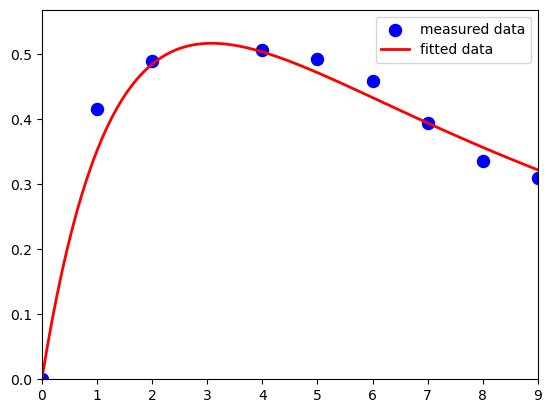

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint


def f(y, t, paras):
    """
    Your system of differential equations
    """

    x1 = y[0]
    x2 = y[1]
    x3 = y[2]

    try:
        k0 = paras['k0'].value
        k1 = paras['k1'].value

    except KeyError:
        k0, k1 = paras
    # the model equations
    f0 = -k0 * x1
    f1 = k0 * x1 - k1 * x2
    f2 = k1 * x2
    return [f0, f1, f2]


def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x


def residual(paras, t, data):

    """
    compute the residual between actual data and fitted data
    """

    x0 = paras['x10'].value, paras['x20'].value, paras['x30'].value
    model = g(t, x0, paras)

    # you only have data for one of your variables
    x2_model = model[:, 1]
    return (x2_model - data).ravel()


# initial conditions
x10 = 5.
x20 = 0
x30 = 0
y0 = [x10, x20, x30]

# measured data
t_measured = np.linspace(0, 9, 10)
x2_measured = np.array([0.000, 0.416, 0.489, 0.595, 0.506, 0.493, 0.458, 0.394, 0.335, 0.309])

plt.figure()
plt.scatter(t_measured, x2_measured, marker='o', color='b', label='measured data', s=75)

# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()
params.add('x10', value=x10, vary=False)
params.add('x20', value=x20, vary=False)
params.add('x30', value=x30, vary=False)
params.add('k0', value=0.4, min=0.0001, max=2.)
params.add('k1', value=0.3, min=0.0001, max=2.)

# fit model
result = minimize(residual, params, args=(t_measured, x2_measured), method='brute')  # leastsq nelder
# check results of the fit
data_fitted = g(np.linspace(0., 9., 100), y0, result.params)

# plot fitted data
plt.plot(np.linspace(0., 9., 100), data_fitted[:, 1], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
plt.xlim([0, max(t_measured)])
plt.ylim([0, 1.1 * max(data_fitted[:, 1])])
# display fitted statistics
report_fit(result)

plt.show()